# Gather data

## Import datasets

We downloaded manually twitter_archive_enhanced.csv, now we'll downloaded programmatically image_predictions.tsv from the url https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


In [2]:
import requests
import os
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
folder_name = 'image-predictions'
#creates a host folder of our new tsv file
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
#store the HTTP status
response = requests.get(url)
#get the tsv file and save it in the destination folder
with open (os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [3]:
#Define my API credentials and get access to my created API
import tweepy

consumer_key = 'KlRknQA8wX9BpzqsYKsyTxHYn'
consumer_secret = 'HFGAyoQwQO0wuX7sZNxfEHb2ihjdf1k4ShDVOYApr250hQSV2V'
access_token = '1046019335070863360-Kjnid48ovWfLgIgzSgzlohdq9yDG9Y'
access_secret = '2WGg5BgENe7xoHkjN3kVUTNSF0cDt3LxaFfTbJI0aH8Pi'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Store the tweet ids from csv file to a list
import pandas as pd
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweets = list(twitter_archive.tweet_id)

In [7]:
#Storing data from API using the list of tweet ids to a JSON file
import time
import json
import os
working =[]
not_working = []
with open('tweet_json.txt', 'w') as file:
    start = time.time()
    for tweet_id in tweets:
        try:
            tweet_details = api.get_status(tweet_id,tweet_mode='extended')
            json.dump(tweet_details._json, file)
            file.write('\n')
            working.append(tweet_id)
        except Exception as e:
            print(tweet_id,e)
            not_working.append(tweet_id)
    end = time.time()
print(end-start)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 [{'code': 144, 'message': 'No status found with that ID.'}]
771004394259247104 [{'code': 179, 'message': 'Sorry,

In [8]:
#Read JSON content as a panda dataframe
tweet_data = pd.read_json('tweet_json.txt', lines = True,encoding='utf-8')

In [9]:
#Access to image-prediction folder and read csv image file in a dataframe
os.chdir('image-predictions')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
os.chdir('..')

In [11]:
os.getcwd()

'C:\\Users\\hp\\desktop\\udacity_nanodegree\\term2\\data_wrangling\\project'

# Assess Data

In [468]:
image_predictions_copy = image_predictions.copy()
twitter_archive_copy = twitter_archive.copy()
tweet_data_copy = tweet_data.copy()

## Visual assessment of image_predictions' quality

In [469]:
image_predictions_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


## Programmatic assessment of image predictions' quality

In [470]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [471]:
image_predictions_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [472]:
image_predictions_copy.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [473]:
#assess if we have any duplicated rows
image_predictions_copy[image_predictions_copy.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [538]:
#assess if all the names are valid
ind = []
for i in range(twitter_archive_copy.shape[0]):
    if len(twitter_archive_copy['name'][i])<2:
        print (twitter_archive_copy['name'][i])
        ind.append(i)

a
a
O
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


## Tidiness of image  predictions table

In [476]:
list(image_predictions_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

## Visual assessemnt of tweet data's quality

In [477]:
tweet_data_copy

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': '{'id': 892420639486877696, ...",38333,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8418,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': '{'id': 892177413194625024, ...",32857,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6206,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': '{'id': 891815175371796480, ...",24748,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4105,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': '{'id': 891689552724799489, ...",41673,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8544,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': '{'id': 891327551943041024, ...",39852,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9273,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': '{'id': 891087942176911360, ...",20002,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,3077,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': '{'id': 890971906207338496, ...",11704,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,2043,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': '{'id': 890729118844600320, ...",64721,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,18663,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': '{'id': 890609177319665665, ...",27511,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,4218,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': '{'id': 890240245463175168, ...",31569,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,7307,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Programmatic assessment of tweet data

In [478]:
#See what is contained in user variable
tweet_data_copy['source'][25]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [479]:
#See what is contained in entities variable
tweet_data_copy['entities'][45]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 883360682745503744,
   'id_str': '883360682745503744',
   'indices': [140, 163],
   'media_url': 'http://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg',
   'url': 'https://t.co/rf661IFEYP',
   'display_url': 'pic.twitter.com/rf661IFEYP',
   'expanded_url': 'https://twitter.com/dog_rates/status/883360690899218434/photo/1',
   'type': 'photo',
   'sizes': {'small': {'w': 544, 'h': 680, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 1280, 'h': 1600, 'resize': 'fit'},
    'medium': {'w': 960, 'h': 1200, 'resize': 'fit'}}}]}

In [480]:
#See what is contained in entities variable
tweet_data_copy['extended_entities'][25]

{'media': [{'id': "{'id': 886983218871902208, 'id_str': '886983218871902208', 'indices': [102, 125], 'media_url': 'http://pbs.twimg.com/media/DE8yicKXoAAnSF8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DE8yicKXoAAnSF8.jpg', 'url': 'https://t.co/I6oNy0CgiT', 'display_url': 'pic.twitter.com/I6oNy0CgiT', 'expanded_url': 'https://twitter.com/dog_rates/status/886983233522544640/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}}}",
   'id_str': '886983218871902208',
   'indices': [102, 125],
   'media_url': 'http://pbs.twimg.com/media/DE8yicKXoAAnSF8.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DE8yicKXoAAnSF8.jpg',
   'url': 'https://t.co/I6oNy0CgiT',
   'display_url': 'pic.twitter.com/I6oNy0CgiT',
   'expanded_url': 'https://twitter.com/dog_rates/status/886983233522544640/photo/1',
   'ty

In [481]:
tweet_data_copy['lang'].value_counts()

en     2323
und       7
nl        3
in        3
tl        1
eu        1
et        1
es        1
ro        1
Name: lang, dtype: int64

In [482]:
tweet_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
display_text_range               2341 non-null object
entities                         2341 non-null object
extended_entities                2067 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null bool
full_text                        2341 non-null object
geo                              0 non-null float64
id                               2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

## Tidiness of tweet_data

In [483]:
tweet_data_copy.sample()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
2312,NaN,NaN,2015-11-17 00:06:54,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666407121513275392, 'id_str'...",108,False,This is a southern Vesuvius bumblegruff. Can d...,NaN,...,NaN,NaN,NaN,NaN,40,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Visual assessment of twitter archive' quality

In [484]:
twitter_archive_copy

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## Programmatical assessment of twitter archive data quality

In [485]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [486]:
twitter_archive_copy.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [539]:
twitter_archive_copy.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [488]:
twitter_archive_copy[twitter_archive_copy['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [489]:
twitter_archive_copy[twitter_archive_copy['tweet_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [490]:
twitter_archive_copy[twitter_archive_copy['retweeted_status_id'].notnull()].shape

(181, 17)

In [491]:
twitter_archive_copy[twitter_archive_copy.rating_denominator<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [492]:
twitter_archive_copy[twitter_archive_copy.rating_denominator>10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [493]:
twitter_archive_copy[twitter_archive_copy.rating_numerator>20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


## Recap of Assessing step

### Quality

- tweet_id in image_prediction_copy type is Object
- Extract tweet_id column from embedded dictionaries in tweet_data_copy table
- Data type of timestamp variable in twitter_archive_copy table is Object
- Column name timestamp is not explicit enough
- Data type of tweet_id variable in twitter_archive_copy table is int
- Data type of retweetd_status_timestamp variable in twitter_archive_copy table is Object
- Data type of retweetd_status_id variable in twitter_archive_copy table is float
- Data type of retweetd_status_user_id variable in twitter_archive_copy table is float
- Some invalid names of dogs in twitter_archive_copy with one letter
- Three observations had a denominator strictly less than 10
- Many observations had a numerator superior than 20
- Many observations had a denominator superior than 10

### Tidiness

- A lot of unnecessary columns
- 4 last columns in twitter_archive_copy table represent the same variable 'type'
- Three tables for sames measurments 

## Cleaning - Quality

convert tweet_id in image_prediction_copy to string

In [494]:
image_predictions_copy['tweet_id'] = image_predictions_copy['tweet_id'].astype(str)

#### Test

In [495]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


Create a tweet_id column in tweet_data_copy table and fill it from extended_entities variable (for example)

In [661]:
for i in range (tweet_data_copy.shape[0]):
    print(type(tweet_data_copy['extended_entities'][i]['media'][0]['id_str']))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


TypeError: 'float' object is not subscriptable

Looks there is a problem to access to the dictionary elements, we will use a try except block to deflict this problem

In [662]:
id_diction = {}
y=0
#for i in range (tweet_data_copy.shape[0]):
try:
    for i in range(tweet_data_copy.shape[0]):
        print (tweet_data_copy['extended_entities'][i]['media'][0]['id_str'])
    #id_diction = {'tweet_id': tweet_data_copy['extended_entities'][i]['media'][0]['id_str'] for i in range(tweet_data_copy.shape[0])}
        y+=1
except:
    elem = 'None'

892420639486877696
892177413194625024
891815175371796480
891689552724799489
891327551943041024
891087942176911360
890971906207338496
890729118844600320
890609177319665665
890240245463175168
890006600089468928
889880888800096258
889665366129029120
889638825424826374
889531127467266049
889278779352338437
888917229776945152
888804981515575296
888554915546542081
888078426338406400
887705281597243393
887517108413886465
887473949361045505
887343120832229379
887101385971384320
886983218871902208
886736868116754432
886680331239161856
886366138128449536


In [663]:
y

29

We notice that there is just 29 valid tweet_id in the table, so it's not relevant to fill in the tweet ids in that way, we'll simply create a new column named 'tweet_id' and fill it from 'working' list created when we imported the json_txt file, this list contains the tweet_ids

In [664]:
#add the tweet_id column
tweet_data_copy['tweet_id'] = working

Convert timestamp variable in twitter_archive_copy table to Datetime type

In [580]:
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

#### Test

In [581]:
type(twitter_archive_copy['timestamp'][2])

pandas._libs.tslibs.timestamps.Timestamp

Change column name timestamp to tweet_date

In [583]:
twitter_archive_copy.rename(columns={'timestamp':'tweet_date'}, inplace=True)

#### Test

In [584]:
twitter_archive_copy['tweet_date'][5]

Timestamp('2017-07-29 00:08:17')

Convert tweet_id variable in twitter_archive_copy to string

In [585]:
twitter_archive_copy['tweet_id'] = twitter_archive_copy['tweet_id'].astype(str)

#### Test

In [586]:
type(twitter_archive_copy['tweet_id'][44])

str

Convert retweeted_status_timestamp variable in twitter_archive_copy table to datetime type

In [587]:
twitter_archive_copy['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_copy['retweeted_status_timestamp'])

#### Test

In [588]:
#Nan values
type(twitter_archive_copy['retweeted_status_timestamp'][777])

pandas._libs.tslibs.nattype.NaTType

In [589]:
type(twitter_archive_copy['retweeted_status_timestamp'][19])

pandas._libs.tslibs.timestamps.Timestamp

Convert retweetd_status_id variable in twitter_archive_copy table to string

In [590]:
twitter_archive_copy['retweeted_status_id'] = twitter_archive_copy['retweeted_status_id'].astype(str)

#### Test

In [591]:
type(twitter_archive_copy['retweeted_status_id'][58])

str

Convert retweetd_status_user_id variable in twitter_archive_copy table to string

In [592]:
twitter_archive_copy['retweeted_status_user_id'] = twitter_archive_copy['retweeted_status_user_id'].astype(str)

#### Test

In [593]:
type(twitter_archive_copy['retweeted_status_user_id'][58])

str

Some invalid names of dogs in twitter_archive_copy with one letter

In [594]:
import re
dog_names = []

for text in twitter_archive_copy['text']:
    # Start with 'This is ' and the fisrt letter of the name is uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        dog_names.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the fisrt letter of the name is uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        dog_names.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the fisrt letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the fisrt letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        dog_names.append(text.split()[3].strip(',').strip('.'))
    # Contain 'named' and the fisrt letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        dog_names.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        dog_names.append('NaN')

len(dog_names)

2356

In [595]:
twitter_archive_copy['dog_name'] = dog_names

In [596]:
list(twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_date',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'dog_name']

#### Test

In [597]:
#assess if all the names are valid
ind = []
for i in range(twitter_archive_copy.shape[0]):
    if len(twitter_archive_copy['dog_name'][i])<2:
        print (twitter_archive_copy['dog_name'][i])
        ind.append(i)
    else:
        ind.append('ok')    

In [598]:
ind.count('ok')

2356

In [599]:
len(ind)

2356

##### Each name is okey

In [600]:
twitter_archive_copy.drop(['name'],axis=1, inplace=True)

In [601]:
list(twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_date',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'dog_name']

In [602]:
twitter_archive_copy['dog_name'].value_counts()

NaN         945
Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
Daisy         7
Oscar         6
Bella         6
Toby          6
Stanley       6
Koda          6
Jax           6
Bailey        6
Bo            6
Milo          5
Chester       5
Louis         5
Rusty         5
Bentley       5
Scout         5
Buddy         5
Leo           5
Oakley        4
Duke          4
Phil          4
           ... 
Evy           1
Snicku        1
Roscoe        1
Chuk          1
Mark          1
Dex           1
Lacy          1
Saydee        1
Goose         1
Sweets        1
Anna          1
Pipsy         1
Cal           1
Monty         1
Erik          1
Jerome        1
Meera         1
Adele         1
Walker        1
Eugene        1
Caryl         1
Sobe          1
Jiminus       1
Pluto         1
Stormy        1
Jeffri        1
Petrick       1
Marq          1
Cheesy        1
Terrenth      1
Name: dog_name, Length: 

Three observations had a denominator strictly less than 10


In [603]:
#If the denominator is less than 10 set it to 10
for i in range(twitter_archive_copy.shape[0]):
    if (twitter_archive_copy['rating_denominator'][i]<10):
        twitter_archive_copy['rating_denominator'][i] = 10

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### Test

In [604]:
twitter_archive_copy[twitter_archive_copy.rating_denominator<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_name


 Many observations had a numerator superior than 20

In [605]:
twitter_archive_copy.rating_denominator.value_counts()

10     2336
11        3
50        3
80        2
20        2
15        1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
16        1
Name: rating_denominator, dtype: int64

In [606]:
#If the denominator is superior than 10 see if the corresponding is superior than 20
for i in range(twitter_archive_copy.shape[0]):
    if (twitter_archive_copy['rating_denominator'][i]>10 and twitter_archive_copy['rating_numerator'][i]>20):
        print(twitter_archive_copy['rating_denominator'][i],'/',twitter_archive_copy['rating_numerator'][i])

70 / 84
150 / 165
170 / 204
50 / 50
90 / 99
80 / 80
50 / 45
50 / 60
40 / 44
130 / 143
110 / 121
120 / 144
80 / 88


The ratios looks normal ! We keep the ratings as they are and work later with float ratios

## Cleaning - Tidiness

Reduce the last four columns in twitter_archive_copy to one column named 'dog_stage'

In [607]:
list(twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_date',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'dog_name']

In [608]:
twitter_archive_copy = pd.melt(twitter_archive_copy, id_vars=['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_date',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name'], value_vars= ['doggo','floofer','pupper','puppo'],
       value_name= 'dog_stage' )

In [609]:
twitter_archive_copy['dog_stage'].value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [624]:
twitter_archive_copy.drop(['variable'], axis=1,inplace=True)

In [625]:
list(twitter_archive_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_date',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage']

In [638]:
twitter_archive_copy[twitter_archive_copy.duplicated()].shape

(6674, 14)

In [643]:
twitter_archive_copy.drop_duplicates(inplace=True)

#### Test

In [645]:
twitter_archive_copy['dog_stage'].value_counts()

None       2356
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [646]:
twitter_archive_copy[twitter_archive_copy.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage


## Store the copies of tables in a new ones

In [647]:
images_cleaned = image_predictions_copy
archive_cleaned = twitter_archive_copy
tweet_data_cleaned = tweet_data_copy

## Gather the cleaned tables

In [648]:
df = pd.merge(images_cleaned,archive_cleaned, on='tweet_id')

In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2409 entries, 0 to 2408
Data columns (total 25 columns):
tweet_id                      2409 non-null object
jpg_url                       2409 non-null object
img_num                       2409 non-null int64
p1                            2409 non-null object
p1_conf                       2409 non-null float64
p1_dog                        2409 non-null bool
p2                            2409 non-null object
p2_conf                       2409 non-null float64
p2_dog                        2409 non-null bool
p3                            2409 non-null object
p3_conf                       2409 non-null float64
p3_dog                        2409 non-null bool
in_reply_to_status_id         27 non-null float64
in_reply_to_user_id           27 non-null float64
tweet_date                    2409 non-null datetime64[ns]
source                        2409 non-null object
text                          2409 non-null object
retweeted_status_id     

In [652]:
df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,nan,nan,NaT,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,nan,NaT,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,nan,NaT,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,nan,NaT,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,nan,NaT,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,None
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,nan,nan,NaT,https://twitter.com/dog_rates/status/666050758...,10,10,NaN,None
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,nan,nan,NaT,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,None
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,nan,nan,NaT,https://twitter.com/dog_rates/status/666055525...,10,10,NaN,None
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,nan,nan,NaT,https://twitter.com/dog_rates/status/666057090...,9,10,NaN,None
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,nan,nan,NaT,https://twitter.com/dog_rates/status/666058600...,8,10,NaN,None


In [668]:
list(tweet_data_cleaned)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'truncated',
 'user',
 'tweet_id']

In [667]:
#Gather tweet_data_cleaned with df
we_rate_dogs = pd.merge(df,tweet_data_cleaned, on = 'tweet_id')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [672]:
#Should convert tweet_id in tweet_data_cleaned to a string
tweet_data_cleaned['tweet_id'] = tweet_data_cleaned['tweet_id'].astype(str)

In [673]:
#Gather tweet_data_cleaned with df
we_rate_dogs = pd.merge(df,tweet_data_cleaned, on = 'tweet_id')

In [674]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2399
Data columns (total 57 columns):
tweet_id                         2400 non-null object
jpg_url                          2400 non-null object
img_num                          2400 non-null int64
p1                               2400 non-null object
p1_conf                          2400 non-null float64
p1_dog                           2400 non-null bool
p2                               2400 non-null object
p2_conf                          2400 non-null float64
p2_dog                           2400 non-null bool
p3                               2400 non-null object
p3_conf                          2400 non-null float64
p3_dog                           2400 non-null bool
in_reply_to_status_id_x          27 non-null float64
in_reply_to_user_id_x            27 non-null float64
tweet_date                       2400 non-null datetime64[ns]
source_x                         2400 non-null object
text                       

### Remove unwanted columns

In [675]:
we_rate_dogs_clean = we_rate_dogs.copy()

In [676]:
list(we_rate_dogs_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'in_reply_to_status_id_x',
 'in_reply_to_user_id_x',
 'tweet_date',
 'source_x',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage',
 'contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id_y',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_y',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source_y',
 'truncated',
 'user']

In [678]:
we_rate_dogs_clean.drop(columns=['in_reply_to_status_id_x',
 'in_reply_to_user_id_x',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp','contributors',
 'coordinates',
'display_text_range',
'geo',
'in_reply_to_screen_name',
 'in_reply_to_status_id_y',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_y',
 'in_reply_to_user_id_str',
 'is_quote_status',
'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
'source_y',
 'truncated',
 'user',
'source_x'
], inplace=True)

#### Test

In [679]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2399
Data columns (total 32 columns):
tweet_id              2400 non-null object
jpg_url               2400 non-null object
img_num               2400 non-null int64
p1                    2400 non-null object
p1_conf               2400 non-null float64
p1_dog                2400 non-null bool
p2                    2400 non-null object
p2_conf               2400 non-null float64
p2_dog                2400 non-null bool
p3                    2400 non-null object
p3_conf               2400 non-null float64
p3_dog                2400 non-null bool
tweet_date            2400 non-null datetime64[ns]
text                  2400 non-null object
expanded_urls         2400 non-null object
rating_numerator      2400 non-null int64
rating_denominator    2400 non-null int64
dog_name              2400 non-null object
dog_stage             2400 non-null object
created_at            2400 non-null datetime64[ns]
entities              2

Notice that id and id_str are int, should be str

In [680]:
we_rate_dogs_clean['id'] = we_rate_dogs_clean['id'].astype(str)
we_rate_dogs_clean['id_str'] = we_rate_dogs_clean['id_str'].astype(str)

In [681]:
we_rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2399
Data columns (total 32 columns):
tweet_id              2400 non-null object
jpg_url               2400 non-null object
img_num               2400 non-null int64
p1                    2400 non-null object
p1_conf               2400 non-null float64
p1_dog                2400 non-null bool
p2                    2400 non-null object
p2_conf               2400 non-null float64
p2_dog                2400 non-null bool
p3                    2400 non-null object
p3_conf               2400 non-null float64
p3_dog                2400 non-null bool
tweet_date            2400 non-null datetime64[ns]
text                  2400 non-null object
expanded_urls         2400 non-null object
rating_numerator      2400 non-null int64
rating_denominator    2400 non-null int64
dog_name              2400 non-null object
dog_stage             2400 non-null object
created_at            2400 non-null datetime64[ns]
entities              2

In [688]:
#Create rating_ratio for plotting purposes
we_rate_dogs_clean['rating_ratio'] = we_rate_dogs_clean['rating_numerator']/we_rate_dogs_clean['rating_denominator']

In [689]:
we_rate_dogs_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,favorited,full_text,id,id_str,lang,place,retweet_count,retweeted,retweeted_status,rating_ratio
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,False,Here we have a Japanese Irish Setter. Lost eye...,666020888022790149,666020888022790144,en,None,508,False,NaN,0.8
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,False,This is a western brown Mitsubishi terrier. Up...,666029285002620928,666029285002620928,en,None,47,False,NaN,0.7
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,False,Here is a very happy pup. Big fan of well-main...,666033412701032449,666033412701032448,en,None,44,False,NaN,0.9
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,False,This is a purebred Piers Morgan. Loves to Netf...,666044226329800704,666044226329800704,en,None,140,False,NaN,0.6
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,False,Here we have a 1949 1st generation vulpix. Enj...,666049248165822465,666049248165822464,en,None,40,False,NaN,0.5


### Store the final dataframe in a csv file

In [739]:
we_rate_dogs_clean.to_csv('twitter_archive_master.csv')

## Visualization and Analysis

### Univariate analysis

#### Plot the distribution of dog stages

In [686]:
import matplotlib.pyplot as plt 
%matplotlib inline

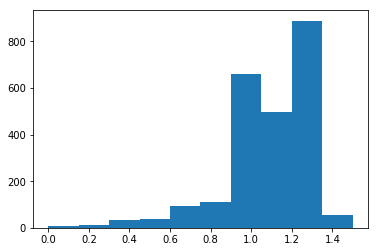

In [711]:
plt.hist(we_rate_dogs_clean['rating_ratio'],range=(0,1.5));

1.2 is the most frequent ratio rating

#### Plot the distribution of dog stages

In [707]:
we_rate_dogs_clean.dog_stage.value_counts()

None       2067
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [708]:
x_axis = ['pupper','doggo', 'puppo', 'floofer']
y_axis = [221, 80, 24, 8]

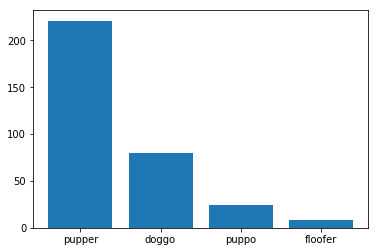

In [710]:
plt.bar(x_axis,y_axis);

Most posted dogs are in pupper stage

### Bivariate Analysis

#### Relation between ratings and favorited posts

(0, 2)

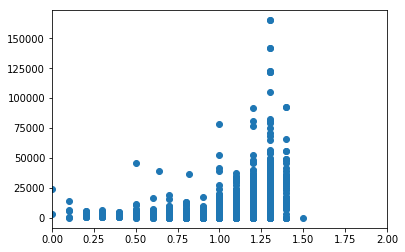

In [736]:
plt.scatter(we_rate_dogs_clean.rating_ratio, we_rate_dogs_clean.favorite_count);
plt.xlim(0,2)

In [732]:
list(we_rate_dogs)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'in_reply_to_status_id_x',
 'in_reply_to_user_id_x',
 'tweet_date',
 'source_x',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage',
 'contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id_y',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_y',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source_y',
 'truncated',
 'user']

Most favorited posts are rated about 1.3

#### Relation between ratings and retweeted favorited posts

(0, 2)

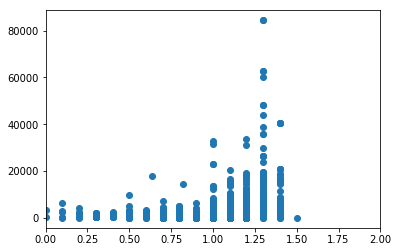

In [738]:
plt.scatter(we_rate_dogs_clean.rating_ratio, we_rate_dogs_clean.retweet_count);
plt.xlim(0,2)

Most retweeted posts are rated about 1.3